In [1]:
%pylab inline
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import tqdm as tqdm

Populating the interactive namespace from numpy and matplotlib


In [83]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
x_train = x_train.astype('float32') /255.0
x_test = x_test.astype('float32')/255.0
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = torch.tensor(x_train.reshape((-1,784)))

In [79]:
modules = []
for i in range(1):
    modules.append(nn.Linear(784,784,bias=True))
    modules.append(nn.ELU())
modules.append(nn.Linear(784,784,bias=True))
model = nn.Sequential(*modules)
#xt = torch.tensor(x_train[0:10].reshape((-1,784)))
#model(xt)

In [80]:
#trainer
optimizer = optim.Adam(model.parameters())
model.train()
bs=100
for i in tqdm.tqdm(range(0,x_train.shape[0],bs)):
    optimizer.zero_grad()
    xx = x_train[i:i+bs]
    yy = model(xx)
    loss = F.mse_loss(xx,-yy)
    loss.backward()
    optimizer.step()

100%|██████████| 600/600 [00:09<00:00, 62.64it/s]


In [81]:
def elu(x):
    x = np.copy(x)
    negs = x < 0
    x[negs] = np.exp(x[negs])-1
    return x

def invelu(x):
    x = np.copy(x)
    negs = x < 0
    x[negs] = np.log(x[negs]+1)
    return x


def forward(x):
    for m in list(model.children()):
        if type(m) == nn.Linear:
            A = m.weight.detach().numpy()
            x =np.dot(x,np.transpose(A))
            x+= m.bias.detach().numpy()
        elif type(m) == nn.ELU:
            x = elu(x)
    return x

def inverse(x):
    for m in list(model.children())[::-1]:
        if type(m) == nn.Linear:
            x-= m.bias.detach().numpy()
            A = m.weight.detach().numpy()
            x =np.dot(x,np.linalg.inv(np.transpose(A)))
        elif type(m) == nn.ELU:
            x = invelu(x)
    return x

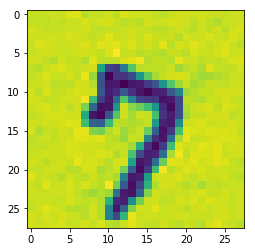

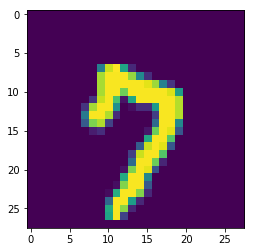

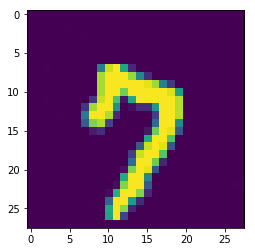

In [82]:
cc = random.randint(0,x_train.shape[0])
xx = x_train[cc:cc+1]
yy = forward(xx.detach().numpy()[0])
imshow(yy.reshape(28,28))
figure()
imshow(xx.reshape(28,28))
figure()
zz = inverse(yy)
imshow(zz.reshape(28,28))

In [85]:
#cc = random.randint(0,x_train.shape[0])
#xx = x_train[cc:cc+1]
#imshow(xx.reshape(28,28))
#figure()
#yy = model(xx).detach().numpy()
#imshow(yy.reshape(28,28))
#figure()
#zz = model(torch.tensor(yy)).detach().numpy()
#imshow(yy.reshape(28,28))